# Лабораторна робота №2
Аналіз методів оптимізації в нейронних мережах

Імпортування бібліотек

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import seaborn as sns

Завантаження датасету

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255

id2class = {
    idx: name for idx, name in enumerate([
        'airplane', 'automobile', 'bird',
        'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'
    ])
}

170498071/170498071 [==============================] - 6s 0us/step


# Створення та навчання моделі
Через Functional API

Створено 5 моделей, для кожного з оптимізаторів окрема модель

In [3]:
def construct_model (input_shape:tuple[int,...], dim_per_layer:list[int], num_classes:int):
  input_layer = layers.Input(shape = input_shape)
  x = layers.Flatten()(input_layer)

  for dim in dim_per_layer:
    x = layers.Dense(dim, activation='relu')(x)
  output_layer = layers.Dense(num_classes)(x)

  return tf.keras.Model(inputs=input_layer, outputs=output_layer)

##1 - Класичний градієнт спуску без імпульсу

In [ ]:
#Класичний градієнтний спуск без імпульсу
model1 = construct_model((32,32,3), dim_per_layer = [512, 512], num_classes = len(id2class))
model1.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

1.1 - При batch_size = 32

In [ ]:
histGD = model1.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    batch_size = 32,
    validation_data = (x_test, y_test)
)

Epoch 1/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8599 - accuracy: 0.3375 - val_loss: 1.7290 - val_accuracy: 0.3813
Epoch 2/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6693 - accuracy: 0.4092 - val_loss: 1.6681 - val_accuracy: 0.3992
Epoch 3/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5882 - accuracy: 0.4396 - val_loss: 1.5513 - val_accuracy: 0.4576
Epoch 4/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5318 - accuracy: 0.4616 - val_loss: 1.5788 - val_accuracy: 0.4422
Epoch 5/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4837 - accuracy: 0.4752 - val_loss: 1.5614 - val_accuracy: 0.4391
Epoch 6/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4450 - accuracy: 0.4891 - val_loss: 1.4949 - val_accuracy: 0.4646
Epoch 7/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4108 - accuracy: 0.5022 - val_loss: 1.4661 - val_accuracy:

In [4]:
def plot_learning_curve(history):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].plot(history.history['accuracy'], color='#b8113d')
    axs[0].plot(history.history['val_accuracy'], color='#6010b5')
    axs[0].set_title('Model accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validation'], loc='upper left')

    axs[1].plot(history.history['loss'], color='#b8113d')
    axs[1].plot(history.history['val_loss'], color='#6010b5')
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validation'], loc='upper left')

    plt.show()

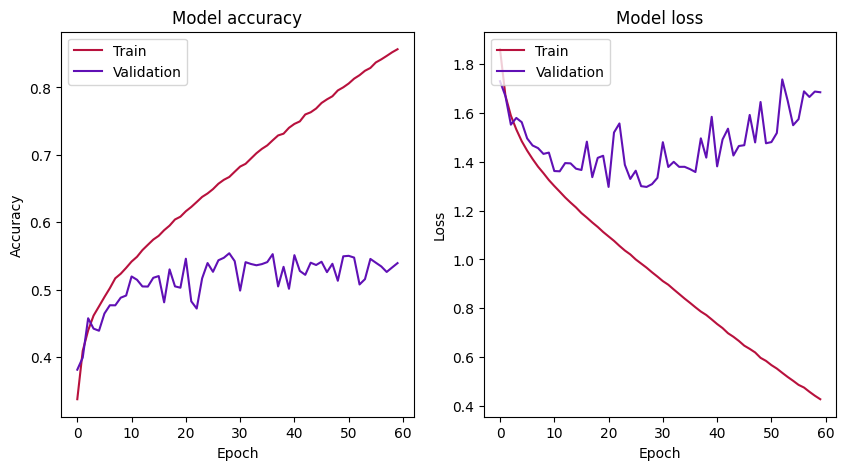

In [ ]:
plot_learning_curve(histGD)

Наявний сильний оверфіт, крім того видно як модель робить різкі "стрибки" у процесі навчання, що пояснюється відсутністю імпульсу.

1.2 - При batch_size = 256

In [ ]:
histGD = model1.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    batch_size = 256,
    validation_data = (x_test, y_test)
)

Epoch 1/60
196/196 [==============================] - 2s 8ms/step - loss: 2.0522 - accuracy: 0.2718 - val_loss: 1.9453 - val_accuracy: 0.3130
Epoch 2/60
196/196 [==============================] - 1s 5ms/step - loss: 1.8830 - accuracy: 0.3415 - val_loss: 1.8526 - val_accuracy: 0.3509
Epoch 3/60
196/196 [==============================] - 1s 5ms/step - loss: 1.8161 - accuracy: 0.3671 - val_loss: 1.8045 - val_accuracy: 0.3677
Epoch 4/60
196/196 [==============================] - 1s 5ms/step - loss: 1.7736 - accuracy: 0.3821 - val_loss: 1.7585 - val_accuracy: 0.3881
Epoch 5/60
196/196 [==============================] - 1s 5ms/step - loss: 1.7374 - accuracy: 0.3964 - val_loss: 1.7367 - val_accuracy: 0.3910
Epoch 6/60
196/196 [==============================] - 1s 5ms/step - loss: 1.7103 - accuracy: 0.4064 - val_loss: 1.7722 - val_accuracy: 0.3765
Epoch 7/60
196/196 [==============================] - 1s 5ms/step - loss: 1.6847 - accuracy: 0.4150 - val_loss: 1.7031 - val_accuracy: 0.3910
Epoch 

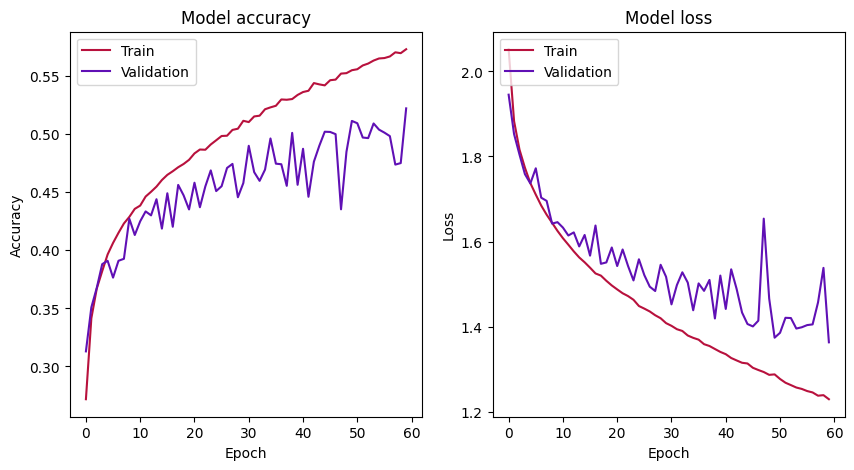

In [ ]:
plot_learning_curve(histGD)

З більшим розміром партії спостерігається значно менший оверфіт, проте досі наявні "стрибки" моделі. Для такого розміру партії можна спробувати збільшити кількість епох для отримання кращих результатів, проте загалом цей оптимізатор доволі гарно підходить для моделі.

##2 - SGD з імпульсом

In [ ]:
#SGD з імпульсом
model2 = construct_model((32,32,3), dim_per_layer = [512, 512], num_classes = len(id2class))
model2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

2.1 - При batch_size = 32

In [ ]:
histSGD = model2.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    batch_size = 32,
    validation_data = (x_test, y_test)
)

Epoch 1/60
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8459 - accuracy: 0.3448 - val_loss: 1.6996 - val_accuracy: 0.4002
Epoch 2/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6596 - accuracy: 0.4137 - val_loss: 1.6546 - val_accuracy: 0.4111
Epoch 3/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5805 - accuracy: 0.4429 - val_loss: 1.5643 - val_accuracy: 0.4422
Epoch 4/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5192 - accuracy: 0.4637 - val_loss: 1.5511 - val_accuracy: 0.4560
Epoch 5/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4739 - accuracy: 0.4801 - val_loss: 1.4848 - val_accuracy: 0.4735
Epoch 6/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4343 - accuracy: 0.4946 - val_loss: 1.4821 - val_accuracy: 0.4715
Epoch 7/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3980 - accuracy: 0.5088 - val_loss: 1.4546 - val_accuracy:

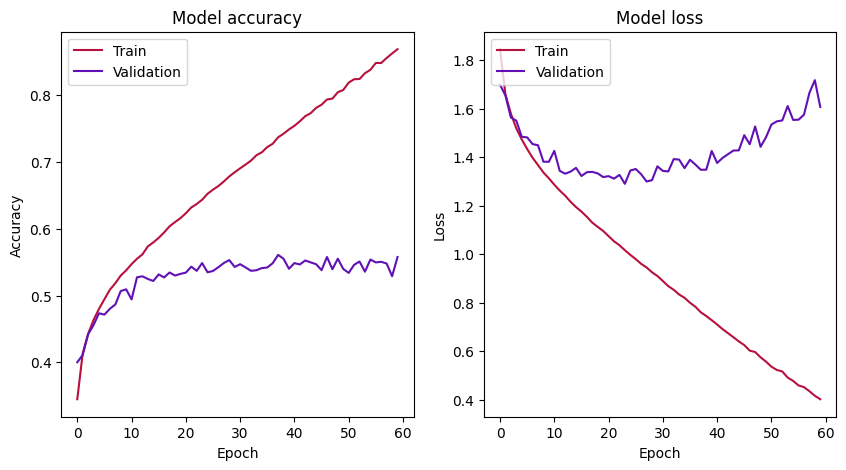

In [ ]:
plot_learning_curve(histSGD)

Спостерігається сильний оверфіт, модель уже стрибає значно менше, що є результатом додавання імпульсу до градієнту. Краще брати більший розмір партії, хоча модель показала один з найкращих результатів.

2.2 - При batch_size = 256

In [ ]:
histSGD = model2.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    batch_size = 256,
    validation_data = (x_test, y_test)
)

Epoch 1/60
196/196 [==============================] - 2s 9ms/step - loss: 2.0717 - accuracy: 0.2616 - val_loss: 1.9336 - val_accuracy: 0.3217
Epoch 2/60
196/196 [==============================] - 1s 6ms/step - loss: 1.8844 - accuracy: 0.3383 - val_loss: 1.8476 - val_accuracy: 0.3516
Epoch 3/60
196/196 [==============================] - 1s 6ms/step - loss: 1.8172 - accuracy: 0.3661 - val_loss: 1.8088 - val_accuracy: 0.3642
Epoch 4/60
196/196 [==============================] - 1s 6ms/step - loss: 1.7721 - accuracy: 0.3821 - val_loss: 1.7571 - val_accuracy: 0.3794
Epoch 5/60
196/196 [==============================] - 1s 6ms/step - loss: 1.7353 - accuracy: 0.3972 - val_loss: 1.7188 - val_accuracy: 0.4019
Epoch 6/60
196/196 [==============================] - 1s 7ms/step - loss: 1.7053 - accuracy: 0.4062 - val_loss: 1.6912 - val_accuracy: 0.4079
Epoch 7/60
196/196 [==============================] - 2s 8ms/step - loss: 1.6803 - accuracy: 0.4167 - val_loss: 1.6760 - val_accuracy: 0.4160
Epoch 

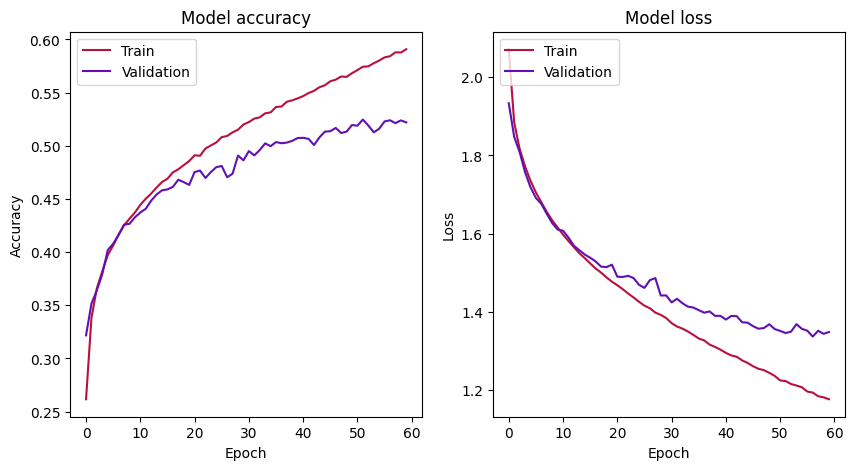

In [ ]:
plot_learning_curve(histSGD)

Значно менший оверфіт, з більшою кількістю епох можливо можна досягти кращих результатів.

##3 - RMSprop

In [9]:
#RMSprop
model3 = construct_model((32,32,3), dim_per_layer = [512, 512], num_classes = len(id2class))
model3.compile(
    optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=1e-3, rho=0.9),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

3.1 - При batch_size = 32

In [6]:
histRSMP = model3.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    batch_size = 32,
    validation_data = (x_test, y_test)
)

Epoch 1/60
1563/1563 [==============================] - 10s 4ms/step - loss: 1.9255 - accuracy: 0.3092 - val_loss: 1.7299 - val_accuracy: 0.3861
Epoch 2/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7260 - accuracy: 0.3812 - val_loss: 1.8092 - val_accuracy: 0.3664
Epoch 3/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6615 - accuracy: 0.4060 - val_loss: 1.7739 - val_accuracy: 0.3708
Epoch 4/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6238 - accuracy: 0.4231 - val_loss: 1.6772 - val_accuracy: 0.4044
Epoch 5/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6008 - accuracy: 0.4303 - val_loss: 1.6661 - val_accuracy: 0.4193
Epoch 6/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5845 - accuracy: 0.4367 - val_loss: 1.6771 - val_accuracy: 0.3974
Epoch 7/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5757 - accuracy: 0.4434 - val_loss: 1.6168 - val_accuracy

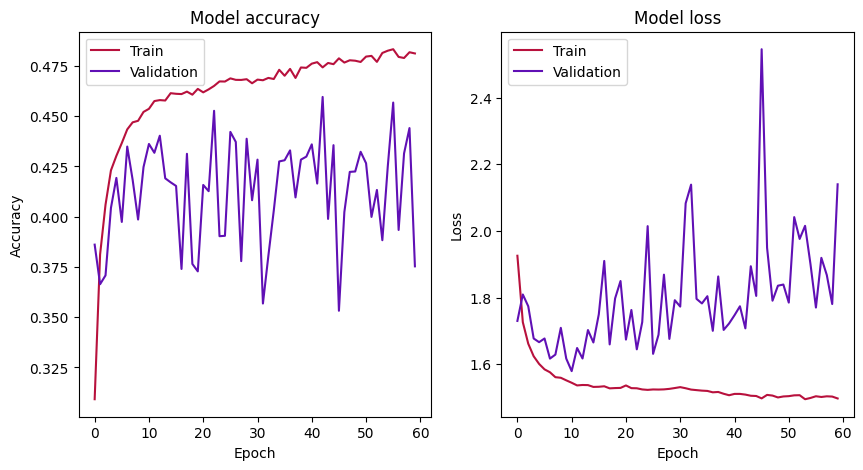

In [7]:
plot_learning_curve(histRSMP)

Цей оптимізатор робить величезні стрибки і взагалі не дуже ясно що він робить, результати моделі є доволі низькими, і схоже він зовсім не підходить для цієї моделі з цими параметрами.

3.2 - При batch_size = 256

In [10]:
histRSMP = model3.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    batch_size = 256,
    validation_data = (x_test, y_test)
)

Epoch 1/60
196/196 [==============================] - 2s 8ms/step - loss: 2.1752 - accuracy: 0.2414 - val_loss: 1.9503 - val_accuracy: 0.2891
Epoch 2/60
196/196 [==============================] - 1s 5ms/step - loss: 1.8532 - accuracy: 0.3325 - val_loss: 2.1230 - val_accuracy: 0.2329
Epoch 3/60
196/196 [==============================] - 1s 5ms/step - loss: 1.7575 - accuracy: 0.3683 - val_loss: 1.8336 - val_accuracy: 0.3256
Epoch 4/60
196/196 [==============================] - 1s 5ms/step - loss: 1.7001 - accuracy: 0.3924 - val_loss: 1.6455 - val_accuracy: 0.4110
Epoch 5/60
196/196 [==============================] - 1s 8ms/step - loss: 1.6469 - accuracy: 0.4148 - val_loss: 1.8800 - val_accuracy: 0.3311
Epoch 6/60
196/196 [==============================] - 1s 7ms/step - loss: 1.5987 - accuracy: 0.4309 - val_loss: 1.9045 - val_accuracy: 0.3338
Epoch 7/60
196/196 [==============================] - 1s 5ms/step - loss: 1.5662 - accuracy: 0.4425 - val_loss: 1.6206 - val_accuracy: 0.4234
Epoch 

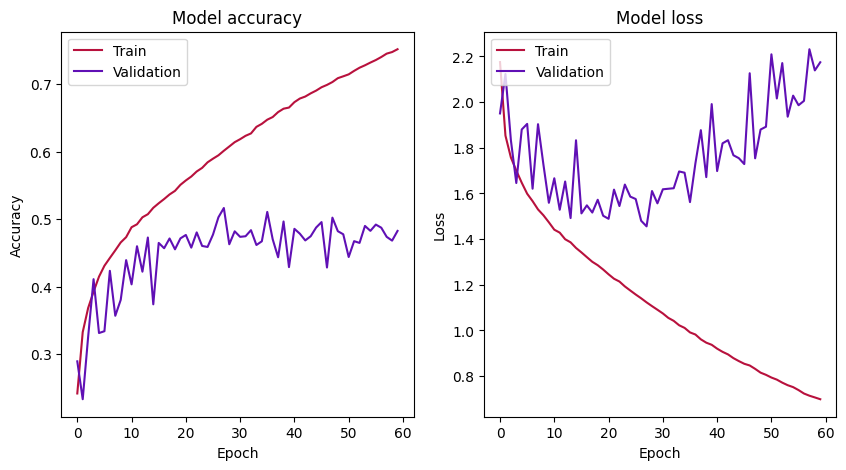

In [11]:
plot_learning_curve(histRSMP)

З більшим розміром партії, графік виглядає краще, проте результати всеодно залишаються не високими.

##4 - Adam

In [15]:
#Adam
model4 = construct_model((32,32,3), dim_per_layer = [512, 512], num_classes = len(id2class))
model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

4.1 - При batch_size = 32

In [13]:
histAdam = model4.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    batch_size = 32,
    validation_data = (x_test, y_test)
)

Epoch 1/60
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8246 - accuracy: 0.3408 - val_loss: 1.6868 - val_accuracy: 0.4074
Epoch 2/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6298 - accuracy: 0.4184 - val_loss: 1.5811 - val_accuracy: 0.4357
Epoch 3/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5400 - accuracy: 0.4510 - val_loss: 1.5156 - val_accuracy: 0.4659
Epoch 4/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4774 - accuracy: 0.4731 - val_loss: 1.4598 - val_accuracy: 0.4803
Epoch 5/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4303 - accuracy: 0.4896 - val_loss: 1.4885 - val_accuracy: 0.4731
Epoch 6/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3895 - accuracy: 0.5058 - val_loss: 1.4238 - val_accuracy: 0.4944
Epoch 7/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3490 - accuracy: 0.5187 - val_loss: 1.3916 - val_accuracy:

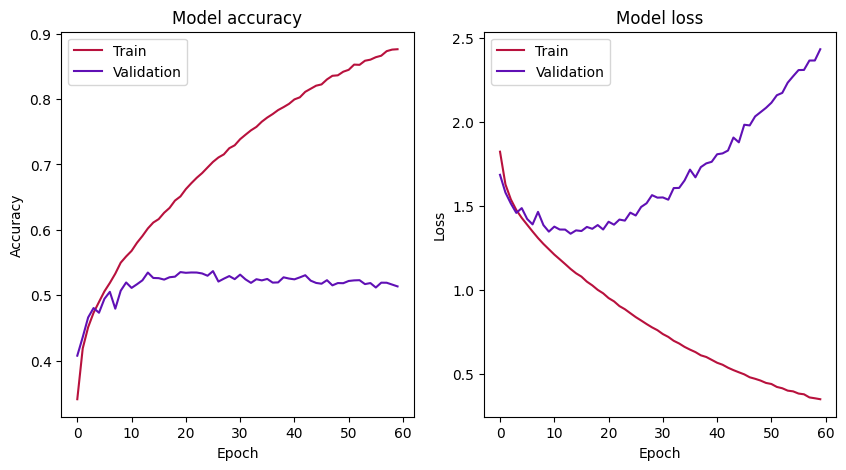

In [14]:
plot_learning_curve(histAdam)

З цим оптимізатором функція втрат дуже сильно росте, точність моделі нормальна, але може бути кращою, наявний оверфіт і точність перестає збільшуватись після 10-15 епох, цього було б достатньо для заданого розміру партії.

4.2 - При batch_size = 256

In [16]:
histAdam = model4.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    batch_size = 256,
    validation_data = (x_test, y_test)
)

Epoch 1/60
196/196 [==============================] - 2s 8ms/step - loss: 1.8630 - accuracy: 0.3337 - val_loss: 1.7172 - val_accuracy: 0.3868
Epoch 2/60
196/196 [==============================] - 1s 5ms/step - loss: 1.6653 - accuracy: 0.4089 - val_loss: 1.6467 - val_accuracy: 0.4242
Epoch 3/60
196/196 [==============================] - 1s 5ms/step - loss: 1.5899 - accuracy: 0.4360 - val_loss: 1.6410 - val_accuracy: 0.4148
Epoch 4/60
196/196 [==============================] - 1s 7ms/step - loss: 1.5350 - accuracy: 0.4566 - val_loss: 1.5320 - val_accuracy: 0.4505
Epoch 5/60
196/196 [==============================] - 1s 7ms/step - loss: 1.4824 - accuracy: 0.4748 - val_loss: 1.4764 - val_accuracy: 0.4753
Epoch 6/60
196/196 [==============================] - 1s 5ms/step - loss: 1.4451 - accuracy: 0.4898 - val_loss: 1.4986 - val_accuracy: 0.4685
Epoch 7/60
196/196 [==============================] - 1s 5ms/step - loss: 1.4030 - accuracy: 0.5028 - val_loss: 1.4499 - val_accuracy: 0.4839
Epoch 

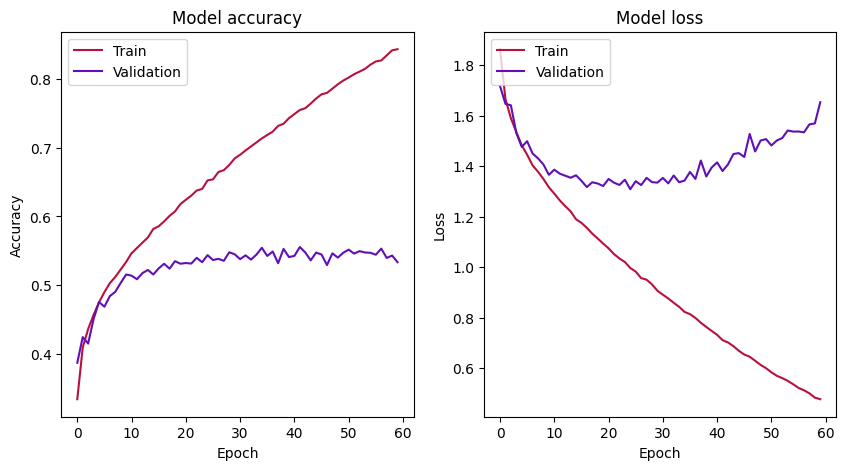

In [17]:
plot_learning_curve(histAdam)

З більшим розміром партії графік виглядає краще, точність залишається сталою але не падає. З цим оптимізатором модель доволі швидко навчається, тож тут також було б достатньо 20-30 епох. Функція втрат зростає не так стрімко як у попередньому випадку.

##5 - Lion

In [24]:
#Lion
model5 = construct_model((32,32,3), dim_per_layer = [512, 512], num_classes = len(id2class))
model5.compile(
    optimizer=tf.keras.optimizers.Lion(learning_rate=3e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

5.1 - При batch_size = 32

In [25]:
histLion = model5.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    batch_size = 32,
    validation_data = (x_test, y_test)
)

Epoch 1/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7639 - accuracy: 0.3673 - val_loss: 1.6355 - val_accuracy: 0.4137
Epoch 2/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6243 - accuracy: 0.4251 - val_loss: 1.6069 - val_accuracy: 0.4272
Epoch 3/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5552 - accuracy: 0.4426 - val_loss: 1.5721 - val_accuracy: 0.4347
Epoch 4/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5482 - accuracy: 0.4502 - val_loss: 1.5667 - val_accuracy: 0.4444
Epoch 5/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5277 - accuracy: 0.4548 - val_loss: 1.5635 - val_accuracy: 0.4514
Epoch 6/60
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5185 - accuracy: 0.4576 - val_loss: 1.5997 - val_accuracy: 0.4436
Epoch 7/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5051 - accuracy: 0.4614 - val_loss: 1.6092 - val_accuracy:

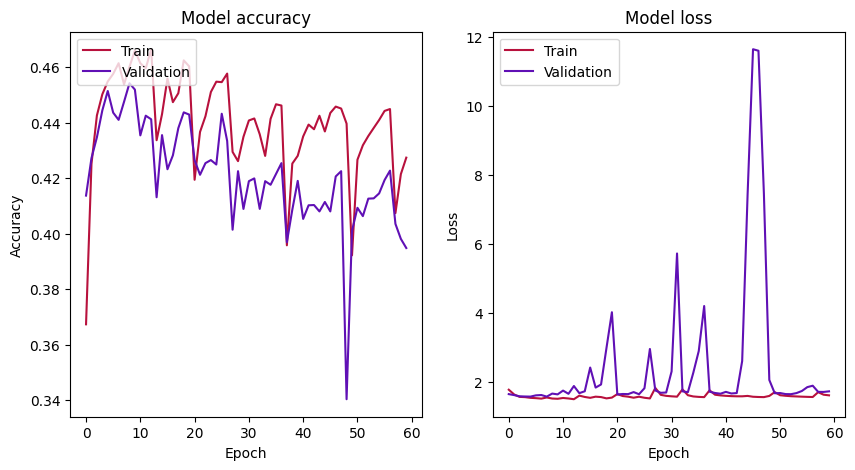

In [26]:
plot_learning_curve(histLion)

Я не знаю що сказати, це просто жахливо

5.2 - При batch_size = 256

In [22]:
histLion = model5.fit(
    x = x_train,
    y = y_train,
    epochs = 60,
    batch_size = 256,
    validation_data = (x_test, y_test)
)

Epoch 1/60
196/196 [==============================] - 2s 8ms/step - loss: 1.8737 - accuracy: 0.3280 - val_loss: 1.6501 - val_accuracy: 0.4202
Epoch 2/60
196/196 [==============================] - 1s 5ms/step - loss: 1.5962 - accuracy: 0.4372 - val_loss: 1.5356 - val_accuracy: 0.4548
Epoch 3/60
196/196 [==============================] - 1s 7ms/step - loss: 1.4874 - accuracy: 0.4727 - val_loss: 1.5123 - val_accuracy: 0.4589
Epoch 4/60
196/196 [==============================] - 1s 6ms/step - loss: 1.4115 - accuracy: 0.5009 - val_loss: 1.4507 - val_accuracy: 0.4851
Epoch 5/60
196/196 [==============================] - 1s 5ms/step - loss: 1.3452 - accuracy: 0.5248 - val_loss: 1.4294 - val_accuracy: 0.4922
Epoch 6/60
196/196 [==============================] - 1s 5ms/step - loss: 1.2916 - accuracy: 0.5421 - val_loss: 1.3984 - val_accuracy: 0.5109
Epoch 7/60
196/196 [==============================] - 1s 5ms/step - loss: 1.2443 - accuracy: 0.5603 - val_loss: 1.3772 - val_accuracy: 0.5101
Epoch 

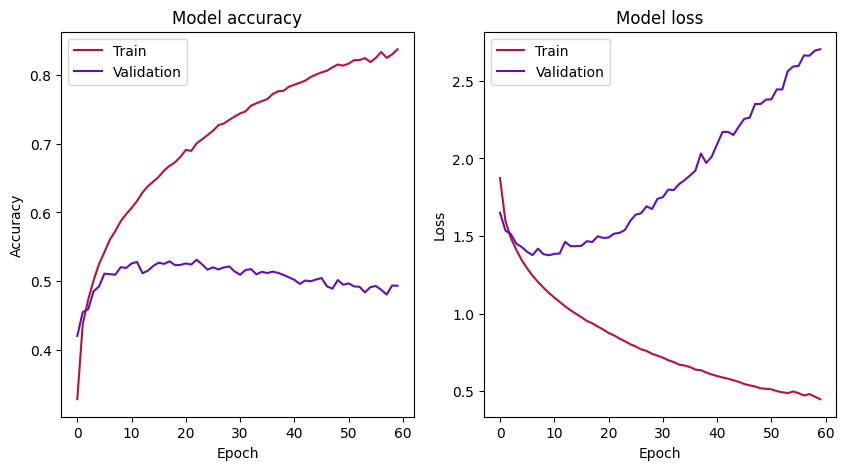

In [23]:
plot_learning_curve(histLion)

Це виглядає набагато краще, але точність падає, функція втрат росте, тож цей оптимізатор не дуже підходить саме для цієї моделі.

# Висновок
Найкращим оптимізатором для цієї моделі виявився SGD з імпульсом та Adam при більших розмірах партії. Ідеальними параметрами були б 60 епох та розмір партії 128, або 70-100 епох та розмір партії 256. Найгіршими оптимізаторами виявились RMSprop та Lion, особливо з малим розміром партії.